### Michael Hotaling
### Assignment 4: Sentiment Analysis
### 12/19/2020

### Importing basic libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

In [2]:
# Loading data into a dataframe
df = pd.read_csv("DailyComments.csv")

In [3]:
df

,Day of Week,comments
0,Monday,"Hello, how are you?"
1,Tuesday,Today is a good day!
2,Wednesday,It's my birthday so it's a really special day!
3,Thursday,Today is neither a good day or a bad day!
4,Friday,I'm having a bad day.
5,Saturday,There' s nothing special happening today.
6,Sunday,Today is a SUPER good day!


### Cleaning

In [4]:
# We can use language_tools to fix some of the spelling errors and grammar issues in the dataset before cleaning it.
# Looking at our data, we can see that Thursdays submission should comtain nor instead of or
# We also have an extra space between "There" and " 's'" in the first word of Saturdays submission
# And Sundays submission is overly complicated since two adjectives are used in conjunction with each other

from language_tool_python import LanguageTool

tool = LanguageTool('en-US')
spell_checked = []
 
for i in df['comments']:
    matches = tool.correct(i)
    spell_checked.append(matches)
df['cleaned'] = spell_checked
df

,Day of Week,comments,cleaned
0,Monday,"Hello, how are you?","Hello, how are you?"
1,Tuesday,Today is a good day!,Today is a good day!
2,Wednesday,It's my birthday so it's a really special day!,It's my birthday so it's a really special day!
3,Thursday,Today is neither a good day or a bad day!,Today is neither a good day nor a bad day!
4,Friday,I'm having a bad day.,I'm having a bad day.
5,Saturday,There' s nothing special happening today.,There's nothing special happening today.
6,Sunday,Today is a SUPER good day!,Today is a Wonderful day!


In [5]:
# Now we can convert all the characters to lower case and remove punctuation

# Lower Case
df['cleaned'] = df['cleaned'].str.lower()

# Removing punctuation
#df["cleaned"] = df['cleaned'].str.replace('[^\w\s]','')
df

,Day of Week,comments,cleaned
0,Monday,"Hello, how are you?","hello, how are you?"
1,Tuesday,Today is a good day!,today is a good day!
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day!
4,Friday,I'm having a bad day.,i'm having a bad day.
5,Saturday,There' s nothing special happening today.,there's nothing special happening today.
6,Sunday,Today is a SUPER good day!,today is a wonderful day!


### Using VADER from NLTK

The Valence Aware Dictionary and sEntiment Reasoner (VADER) is a rule based sentiment analyzer that is used primarily in social media. 

https://github.com/cjhutto/vaderSentiment#about-the-scoring

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [7]:
def vader_sentiment(arr):
    """Returns the VADER sentiment score (between -1 and 1) for a string"""
    vader = SentimentIntensityAnalyzer()
    return vader.polarity_scores(arr)['compound']

df['vader'] = df['cleaned'].apply(vader_sentiment)
df

,Day of Week,comments,cleaned,vader
0,Monday,"Hello, how are you?","hello, how are you?",0.0000
1,Tuesday,Today is a good day!,today is a good day!,0.4926
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,0.5497
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day!,0.1867
4,Friday,I'm having a bad day.,i'm having a bad day.,-0.5423
5,Saturday,There' s nothing special happening today.,there's nothing special happening today.,-0.3089
6,Sunday,Today is a SUPER good day!,today is a wonderful day!,0.6114


In [8]:
def score_analyzer(arr):
    """VADER documentation states that any values 0.05 are to be considered postive and values below 
        -0.05 are to be considered negative"""
    if arr >= 0.05:
        return "positive"
    elif arr > -0.05 and arr < 0.05:
        return "neutral"
    elif arr <= -0.05:
        return "negative"

In [9]:
df

,Day of Week,comments,cleaned,vader
0,Monday,"Hello, how are you?","hello, how are you?",0.0000
1,Tuesday,Today is a good day!,today is a good day!,0.4926
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,0.5497
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day!,0.1867
4,Friday,I'm having a bad day.,i'm having a bad day.,-0.5423
5,Saturday,There' s nothing special happening today.,there's nothing special happening today.,-0.3089
6,Sunday,Today is a SUPER good day!,today is a wonderful day!,0.6114


In [10]:
def colorizer(arr):
    """Returns 3 colors based on the input number"""
    if arr > 0.05:
        return "green"
    elif 0.05 > arr > -0.05:
        return "grey"
    elif 0.5 > arr:
        return "red"

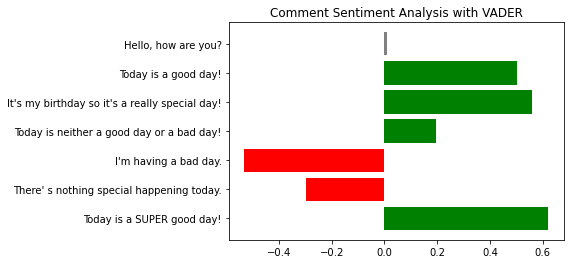

In [11]:
plt.barh(y=df['comments'], width = df['vader']+0.01, color = df['vader'].apply(colorizer))
plt.title("Comment Sentiment Analysis with VADER")
plt.gca().invert_yaxis()

### Using TextBlob from textblob

In [12]:
from textblob import TextBlob

In [13]:
def textblob_sentiment(arr):
    """Returns the Textblob sentiment of a sting"""
    return TextBlob(arr).sentiment.polarity

In [14]:
df['textblob'] = df['cleaned'].apply(textblob_sentiment).round(4)
#df['textblob_sentiment'] = df['textblob'].apply(score_analyzer)

In [15]:
df

,Day of Week,comments,cleaned,vader,textblob
0,Monday,"Hello, how are you?","hello, how are you?",0.0000,0.0000
1,Tuesday,Today is a good day!,today is a good day!,0.4926,0.8750
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,0.5497,0.4464
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day!,0.1867,-0.0875
4,Friday,I'm having a bad day.,i'm having a bad day.,-0.5423,-0.7000
5,Saturday,There' s nothing special happening today.,there's nothing special happening today.,-0.3089,0.3571
6,Sunday,Today is a SUPER good day!,today is a wonderful day!,0.6114,1.0000


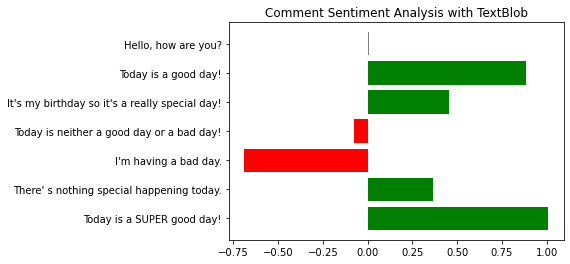

In [16]:
plt.barh(y=df['comments'], width = df['textblob']+0.01, color = df['textblob'].apply(colorizer))
plt.title("Comment Sentiment Analysis with TextBlob")
plt.gca().invert_yaxis()

### Using NaiveBayes from textblob

In [17]:
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

def naive_bayes(arr):
    """Returns the textblob NaiveBayes sentiments score for a string"""
    blobber = Blobber(analyzer=NaiveBayesAnalyzer())
    np_blob = blobber(arr)
    return (np_blob.sentiment.p_pos - np_blob.sentiment.p_neg)

df['naive_bayes'] = df['cleaned'].apply(naive_bayes).round(4)
df

,Day of Week,comments,cleaned,vader,textblob,naive_bayes
0,Monday,"Hello, how are you?","hello, how are you?",0.0000,0.0000,-0.2662
1,Tuesday,Today is a good day!,today is a good day!,0.4926,0.8750,0.4530
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,0.5497,0.4464,0.0535
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day!,0.1867,-0.0875,-0.2683
4,Friday,I'm having a bad day.,i'm having a bad day.,-0.5423,-0.7000,-0.2352
5,Saturday,There' s nothing special happening today.,there's nothing special happening today.,-0.3089,0.3571,0.1775
6,Sunday,Today is a SUPER good day!,today is a wonderful day!,0.6114,1.0000,0.7440


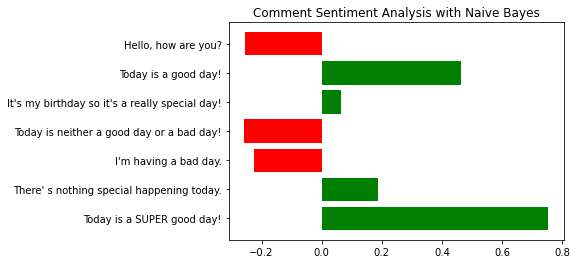

In [18]:
plt.barh(y=df['comments'], width = df['naive_bayes']+0.01, color = df['naive_bayes'].apply(colorizer))
plt.title("Comment Sentiment Analysis with Naive Bayes")
plt.gca().invert_yaxis()

### Using TextClassifier from flair (using pre-trained IMDB data)

In [19]:
from flair.models import TextClassifier
from flair.data import Sentence
import re

In [20]:
classifier = TextClassifier.load('en-sentiment',)

2021-01-09 09:01:53,927 loading file C:\Users\hotal\.flair\models\sentiment-en-mix-distillbert_3.1.pt


In [21]:
def flair_classifier(arr):
    """Returns the Flair sentiment score for a string"""
    sentence = Sentence(arr)
    classifier.predict(sentence)
    x,y = str(sentence.labels[0]).split()
    y = float(re.sub('[()]', '', y))
    if x == "NEGATIVE":
        y = -y
    return y
    
df['flair'] = df['cleaned'].apply(flair_classifier)
df

,Day of Week,comments,cleaned,vader,textblob,naive_bayes,flair
0,Monday,"Hello, how are you?","hello, how are you?",0.0000,0.0000,-0.2662,0.6480
1,Tuesday,Today is a good day!,today is a good day!,0.4926,0.8750,0.4530,0.9926
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,0.5497,0.4464,0.0535,0.9964
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day!,0.1867,-0.0875,-0.2683,-0.9849
4,Friday,I'm having a bad day.,i'm having a bad day.,-0.5423,-0.7000,-0.2352,-0.9994
5,Saturday,There' s nothing special happening today.,there's nothing special happening today.,-0.3089,0.3571,0.1775,-0.9999
6,Sunday,Today is a SUPER good day!,today is a wonderful day!,0.6114,1.0000,0.7440,0.9928


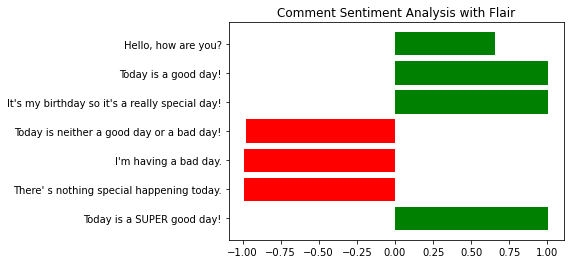

In [22]:
plt.barh(y=df['comments'], width = df['flair']+0.01, color = df['flair'].apply(colorizer))
plt.title("Comment Sentiment Analysis with Flair")
plt.gca().invert_yaxis()

### Using IBM Watson NPL Model

In [23]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions, EntitiesOptions

In [24]:
# Loading in login parameters

with open('parameter.json') as f:
    data = json.load(f)

In [25]:
# Connecting to API

authenticator = IAMAuthenticator(data['apikey'])
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2020-08-01',
    authenticator=authenticator
)

natural_language_understanding.set_service_url(data['url'])

In [26]:
# Iterate over the comments and return the score for each entry

watson_sentiment = []

for i in df['comments']:
    response = natural_language_understanding.analyze(
        text=i,
        features=Features(sentiment=SentimentOptions(document=True))).get_result()
    watson_sentiment.append(response['sentiment']['document']['score'])

df['watson'] = watson_sentiment
df

,Day of Week,comments,cleaned,vader,textblob,naive_bayes,flair,watson
0,Monday,"Hello, how are you?","hello, how are you?",0.0000,0.0000,-0.2662,0.6480,0.000000
1,Tuesday,Today is a good day!,today is a good day!,0.4926,0.8750,0.4530,0.9926,0.950350
2,Wednesday,It's my birthday so it's a really special day!,it's my birthday so it's a really special day!,0.5497,0.4464,0.0535,0.9964,0.961833
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day!,0.1867,-0.0875,-0.2683,-0.9849,-0.915686
4,Friday,I'm having a bad day.,i'm having a bad day.,-0.5423,-0.7000,-0.2352,-0.9994,-0.958711
5,Saturday,There' s nothing special happening today.,there's nothing special happening today.,-0.3089,0.3571,0.1775,-0.9999,-0.759341
6,Sunday,Today is a SUPER good day!,today is a wonderful day!,0.6114,1.0000,0.7440,0.9928,0.935386


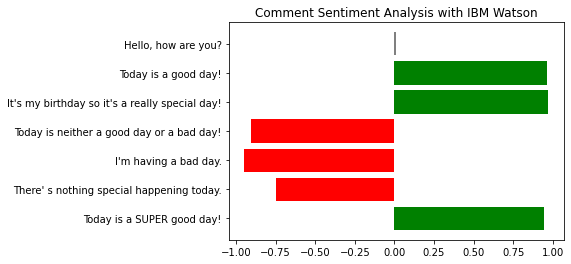

In [27]:
plt.barh(y=df['comments'], width = df['watson']+0.01, color = df['watson'].apply(colorizer))
plt.title("Comment Sentiment Analysis with IBM Watson")
plt.gca().invert_yaxis()

### Overview

Overall, both Vader and Textblob performed the best.
I didn't expect Flair to perform very well since it was trained using IMDB data. This data is not very similar. 
Naive Bayes is a pretty simplistic method, so it doesn't perform exceptionally well, but it does work.
I was somewhat suprised to see IBM Watson fall behind the other four algorithms, considering how robust it is suppose to be. 

### Extra Credit: Analyzing Tweet Sentiment

In [28]:
import tweepy as tw
import json

In [29]:
# Loading login parameters

with open('twitter_auth.json') as f:
    auth = json.load(f)
    consumer_key = auth['consumer_key']
    consumer_secret = auth['consumer_key_secret']
    access_token = auth['access_key']
    access_token_secret = auth['access_key_secret']

In [30]:
# Logging into Twitter through the tweepy package

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

In [31]:
# Define the search term and the date_since date as variables
search_words = input("Select a Search Topic: ")
date_since = "2018-11-16"

# Add some other conditions like removing retweets and searching for verified only accounts
new_search = search_words + " -filter:retweets" #+ " filter:verified"

Select a Search Topic: The Mandalorian


In [32]:
# Retrieving the results from our search

tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(300)

# Add the results to a dataframe
data = [[tweet.user.screen_name, tweet.text,tweet.favorite_count, tweet.retweet_count] for tweet in tweets]
tweet_text = pd.DataFrame(data=data, 
                    columns=['user','text','likes','retweets'])
tweet_text

,user,text,likes,retweets
0,jewelzaid1998,@RahulKohli13 @PedroPascal1 Okay okay but hear...,0,0
1,8Bit_SD,Seeking.. \nMy 3rd SFM poster as fan art! with...,0,0
2,gmoga,[pe blog] Vox: “The technology that’s replacin...,0,0
3,Tanfidz_T,"Omg, I think Cobra Kai is the best series ever...",0,0
4,shellhaed,am i the only one who thought baby yoda / grog...,0,0
...,...,...,...,...
295,the1990sOdd,@nsalsafira the mandalorian,0,0
296,globalfirstnews,The Huge Reveal in THE MANDALORIAN Season 2 Wa...,0,1
297,CoolDealCA,Preorders up for the NERF #StarWars #Mandalori...,1,0
298,FatKidDeals,Preorders up for the NERF Star Wars Mandaloria...,10,0


In [33]:
def remove_at_mentions(arr):
    """Removes @mentions from the text"""
    return re.sub(r'@[A-Za-z0-9_.]+','',arr)

def fix_html_encoding(arr):
    """Removes HTML Encoding from the raw text"""
    return BeautifulSoup(arr, 'lxml').get_text()

def remove_urls(arr):
    """Removes URLS from the text"""
    return re.sub('https?://[A-Za-z0-9./]+','',arr)

def remove_hashtags(arr):
    """Removes hashtags from the text"""
    return re.sub("[^a-zA-Z]", " ", arr)

def remove_emoji(arr):
    """Removes emojies from the text"""
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', arr)


tweet_text["cleaned"] = tweet_text['text'].apply(remove_at_mentions)
tweet_text["cleaned"] = tweet_text['cleaned'].apply(fix_html_encoding)
tweet_text["cleaned"] = tweet_text['cleaned'].apply(remove_urls)
tweet_text["cleaned"] = tweet_text['cleaned'].apply(remove_hashtags)
tweet_text['cleaned'] = tweet_text['cleaned'].apply(remove_emoji)
tweet_text['cleaned'] = tweet_text['cleaned'].str.replace("\n", " ")


# Removing punctuation
#tweet_text["cleaned"] = tweet_text['cleaned'].str.replace('[^\w\s]','')
tweet_text

,user,text,likes,retweets,cleaned
0,jewelzaid1998,@RahulKohli13 @PedroPascal1 Okay okay but hear...,0,0,Okay okay but hear me out Rahul On The M...
1,8Bit_SD,Seeking.. \nMy 3rd SFM poster as fan art! with...,0,0,Seeking My rd SFM poster as fan art with ...
2,gmoga,[pe blog] Vox: “The technology that’s replacin...,0,0,pe blog Vox The technology that s replacin...
3,Tanfidz_T,"Omg, I think Cobra Kai is the best series ever...",0,0,Omg I think Cobra Kai is the best series ever...
4,shellhaed,am i the only one who thought baby yoda / grog...,0,0,am i the only one who thought baby yoda grog...
...,...,...,...,...,...
295,the1990sOdd,@nsalsafira the mandalorian,0,0,the mandalorian
296,globalfirstnews,The Huge Reveal in THE MANDALORIAN Season 2 Wa...,0,1,The Huge Reveal in THE MANDALORIAN Season Wa...
297,CoolDealCA,Preorders up for the NERF #StarWars #Mandalori...,1,0,Preorders up for the NERF StarWars Mandalori...
298,FatKidDeals,Preorders up for the NERF Star Wars Mandaloria...,10,0,Preorders up for the NERF Star Wars Mandaloria...


In [34]:
tweet_text['vader'] = tweet_text['cleaned'].apply(vader_sentiment)
tweet_text['textblob'] = tweet_text['cleaned'].apply(textblob_sentiment)

In [35]:
tweet_text

,user,text,likes,retweets,cleaned,vader,textblob
0,jewelzaid1998,@RahulKohli13 @PedroPascal1 Okay okay but hear...,0,0,Okay okay but hear me out Rahul On The M...,0.2263,0.500
1,8Bit_SD,Seeking.. \nMy 3rd SFM poster as fan art! with...,0,0,Seeking My rd SFM poster as fan art with ...,-0.1578,-0.250
2,gmoga,[pe blog] Vox: “The technology that’s replacin...,0,0,pe blog Vox The technology that s replacin...,0.0000,-0.200
3,Tanfidz_T,"Omg, I think Cobra Kai is the best series ever...",0,0,Omg I think Cobra Kai is the best series ever...,0.6369,0.625
4,shellhaed,am i the only one who thought baby yoda / grog...,0,0,am i the only one who thought baby yoda grog...,-0.5423,-0.350
...,...,...,...,...,...,...,...
295,the1990sOdd,@nsalsafira the mandalorian,0,0,the mandalorian,0.0000,0.000
296,globalfirstnews,The Huge Reveal in THE MANDALORIAN Season 2 Wa...,0,1,The Huge Reveal in THE MANDALORIAN Season Wa...,0.3182,0.400
297,CoolDealCA,Preorders up for the NERF #StarWars #Mandalori...,1,0,Preorders up for the NERF StarWars Mandalori...,0.2003,0.000
298,FatKidDeals,Preorders up for the NERF Star Wars Mandaloria...,10,0,Preorders up for the NERF Star Wars Mandaloria...,-0.4230,0.000


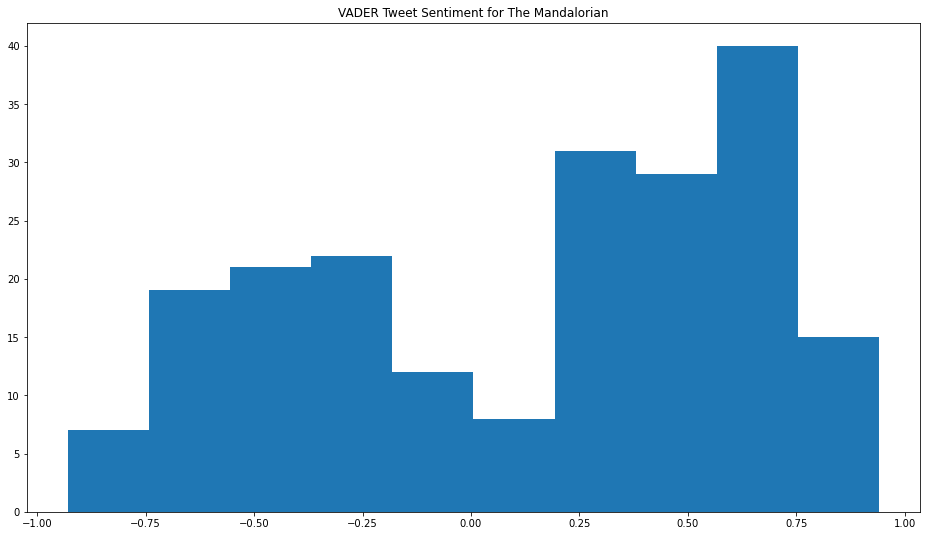

In [36]:
plt.figure(figsize=(16,9))
plt.hist(tweet_text[tweet_text['vader'] != 0]['vader'], bins = 10);
plt.title("VADER Tweet Sentiment for {}".format(search_words))
plt.show()

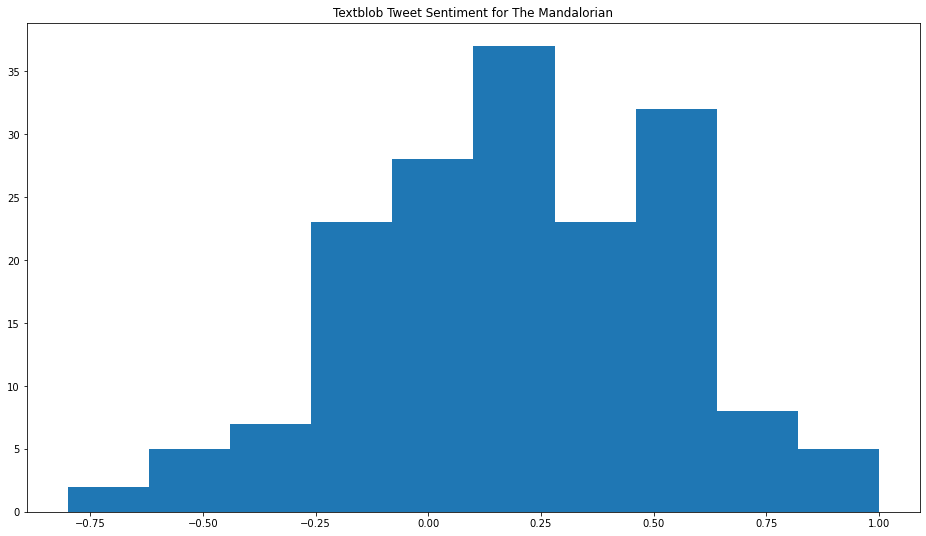

In [37]:
plt.figure(figsize=(16,9))
plt.hist(tweet_text[tweet_text['textblob'] != 0]['textblob'], bins = 10);
plt.title("Textblob Tweet Sentiment for {}".format(search_words))
plt.show()